In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../evaluation.csv')

In [3]:
df

,relatorio,voto,acordao,generated,model,n_examples,temperature,bert_score_precision,bert_score_recall,bert_score_f1,bleu_score,meteor_score,rouge1,rouge2,rougeL
0,1. Trata o presente processo da Prestação de C...,"Em face dos dados apresentados nos autos, veri...","Vistos, relatados e discutidos os autos do pro...",**Tribunal de Contas do Estado do Acre**\n\n**...,llama-3.1-8b-instant,0,0.25,0.703757,0.678256,0.690771,0.462479,0.647883,0.667814,0.572414,0.578313
1,Tratam os autos da aposentadoria do servidor p...,Trata-se de apreciação da legalidade e registr...,"Vistos, relatados e discutidos os autos do pro...",**Tribunal de Contas do Estado do Acre**\n\n**...,llama-3.1-8b-instant,0,0.25,0.700539,0.708395,0.704445,0.262055,0.532079,0.476636,0.421546,0.453271
2,1. Tratam os autos de Denúncia protocolada na ...,O EXMO. SENHOR CONSELHEIRO ANTONIO CRISTOVÃO C...,"Vistos, relatados e discutidos os autos do pro...",**Tribunal de Contas do Estado do Acre**\n\n**...,llama-3.1-8b-instant,0,0.25,0.646800,0.675788,0.660976,0.178810,0.570724,0.383529,0.294811,0.322353
3,1. Trata-se de apreciação da legalidade e regi...,A EXMA. SENHORA CONSELHEIRA DULCINÉA BENÍCIO D...,"Vistos, relatados e discutidos os autos do pro...",**Tribunal de Contas do Estado do Acre**\n\n**...,llama-3.1-8b-instant,0,0.25,0.687704,0.701571,0.694568,0.279491,0.663503,0.565333,0.470588,0.410667
4,Tratam os autos da aposentadoria da servidora ...,Trata-se de apreciação da legalidade e registr...,"Vistos, relatados e discutidos os autos do pro...",**Tribunal de Contas do Estado do Acre**\n\n**...,llama-3.1-8b-instant,0,0.25,0.735396,0.751823,0.743519,0.403997,0.807132,0.635682,0.580451,0.608696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,1. Tratam os autos da Prestação de Contas do G...,O EXMO. SENHOR CONSELHEIRO ANTONIO CRISTOVÃO C...,"Vistos, relatados e discutidos os autos do pro...",**Tribunal de Contas do Estado do Acre**\n\n**...,llama3.1,2,1.00,0.708064,0.785710,0.744869,0.132268,0.479541,0.370370,0.214442,0.244009
3596,1. Tratam os autos de Denúncia protocolada na ...,O EXMO. SENHOR CONSELHEIRO ANTONIO CRISTOVÃO C...,"Vistos, relatados e discutidos os autos do pro...",Tal acórdão não contém informações de natureza...,llama3.1,2,1.00,0.651039,0.564786,0.604853,0.000000,0.025424,0.107623,0.009050,0.062780
3597,Tratam os autos da aposentadoria da servidora ...,Trata-se de apreciação da legalidade e registr...,"Vistos, relatados e discutidos os autos do pro...",**Tribunal de Contas do Estado do Acre**\n\n**...,llama3.1,2,1.00,0.717852,0.720971,0.719408,0.310503,0.607542,0.587519,0.467176,0.480974
3598,1. Trata o presente processo da aposentadoria ...,A EXMA. SENHORA CONSELHEIRA-SUBSTITUTA MARIA D...,"Vistos, relatados e discutidos os autos do pro...",Tribunal de Contas do Estado do Acre.\n\nCódig...,llama3.1,2,1.00,0.663852,0.686129,0.674807,0.192522,0.445641,0.456609,0.265060,0.277704


In [4]:
df.columns

Index(['relatorio', 'voto', 'acordao', 'generated', 'model', 'n_examples',
       'temperature', 'bert_score_precision', 'bert_score_recall',
       'bert_score_f1', 'bleu_score', 'meteor_score', 'rouge1', 'rouge2',
       'rougeL'],
      dtype='object')

In [5]:
summary = df.drop(['relatorio', 'voto', 'acordao', 'generated', 'model'], axis=1).groupby(['temperature', 'n_examples']).agg(['min', 'mean', 'max', 'median', 'std'])

In [6]:
summary.columns

MultiIndex([('bert_score_precision',    'min'),
            ('bert_score_precision',   'mean'),
            ('bert_score_precision',    'max'),
            ('bert_score_precision', 'median'),
            ('bert_score_precision',    'std'),
            (   'bert_score_recall',    'min'),
            (   'bert_score_recall',   'mean'),
            (   'bert_score_recall',    'max'),
            (   'bert_score_recall', 'median'),
            (   'bert_score_recall',    'std'),
            (       'bert_score_f1',    'min'),
            (       'bert_score_f1',   'mean'),
            (       'bert_score_f1',    'max'),
            (       'bert_score_f1', 'median'),
            (       'bert_score_f1',    'std'),
            (          'bleu_score',    'min'),
            (          'bleu_score',   'mean'),
            (          'bleu_score',    'max'),
            (          'bleu_score', 'median'),
            (          'bleu_score',    'std'),
            (        'meteor_score',    

In [7]:
!pip install ace-tools

<Figure size 1000x600 with 0 Axes>

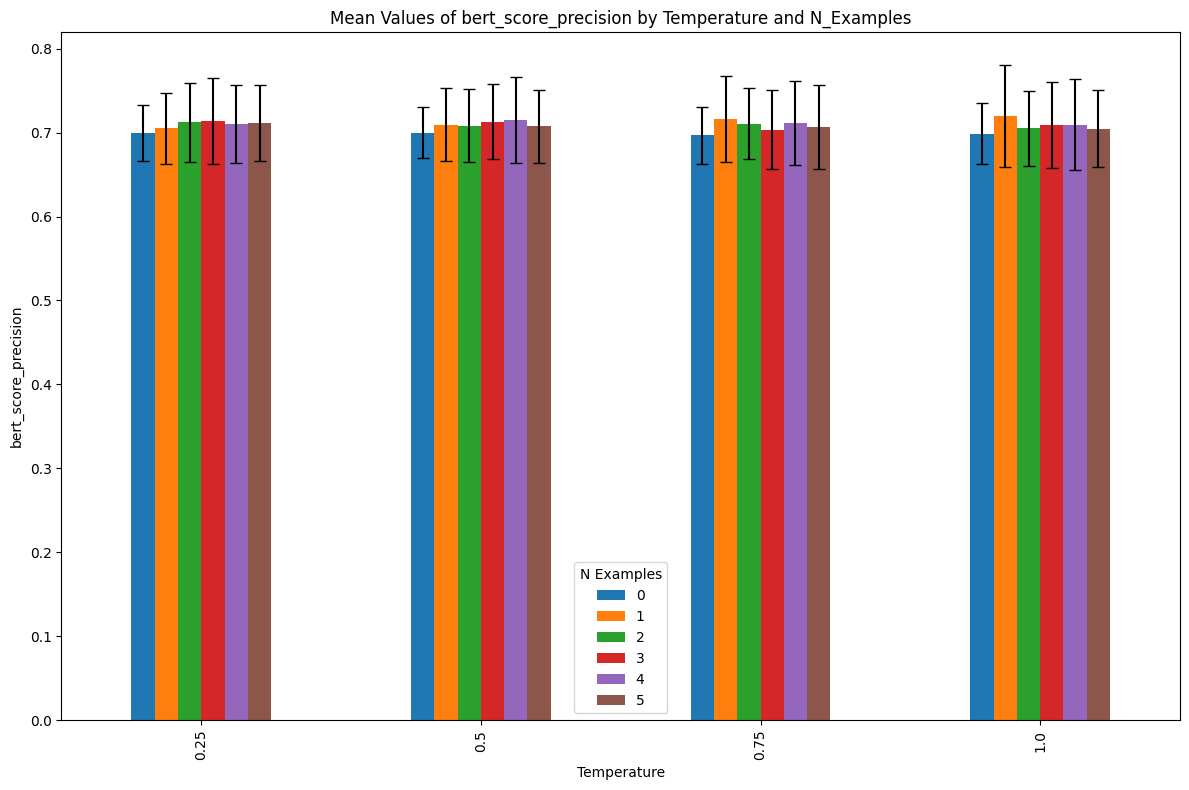

<Figure size 1000x600 with 0 Axes>

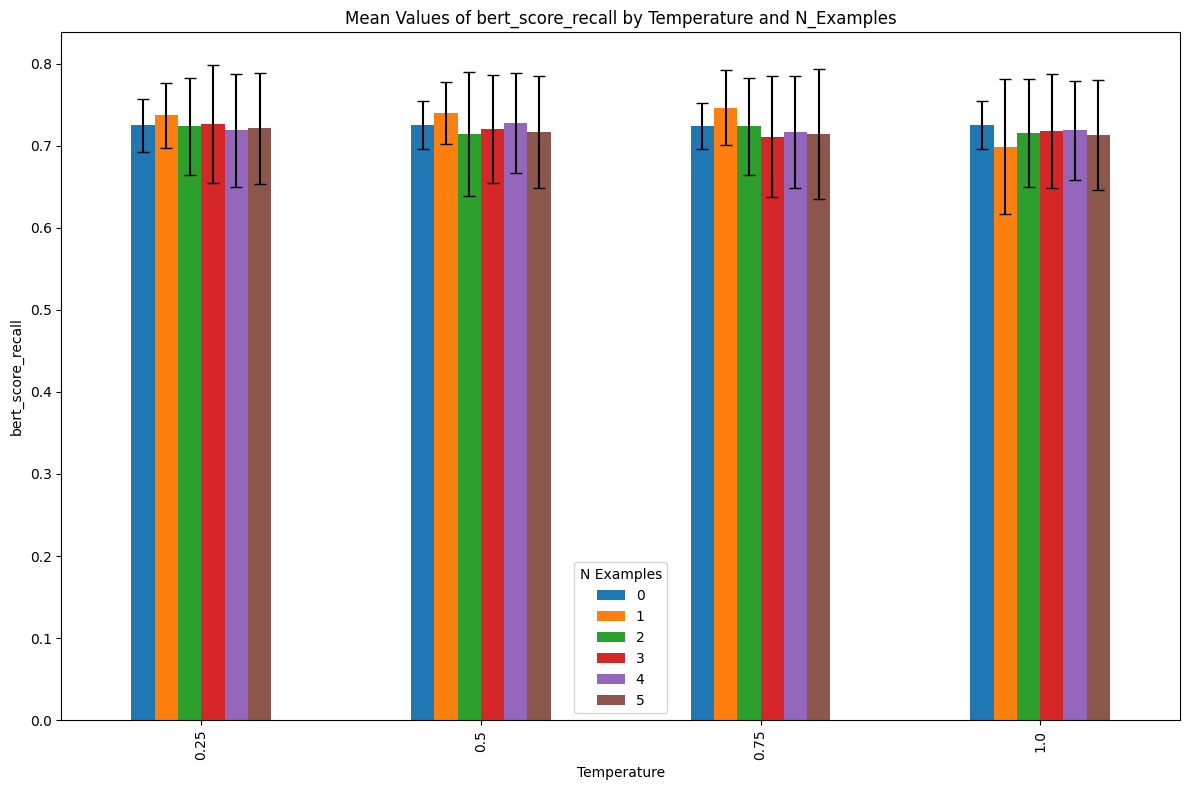

<Figure size 1000x600 with 0 Axes>

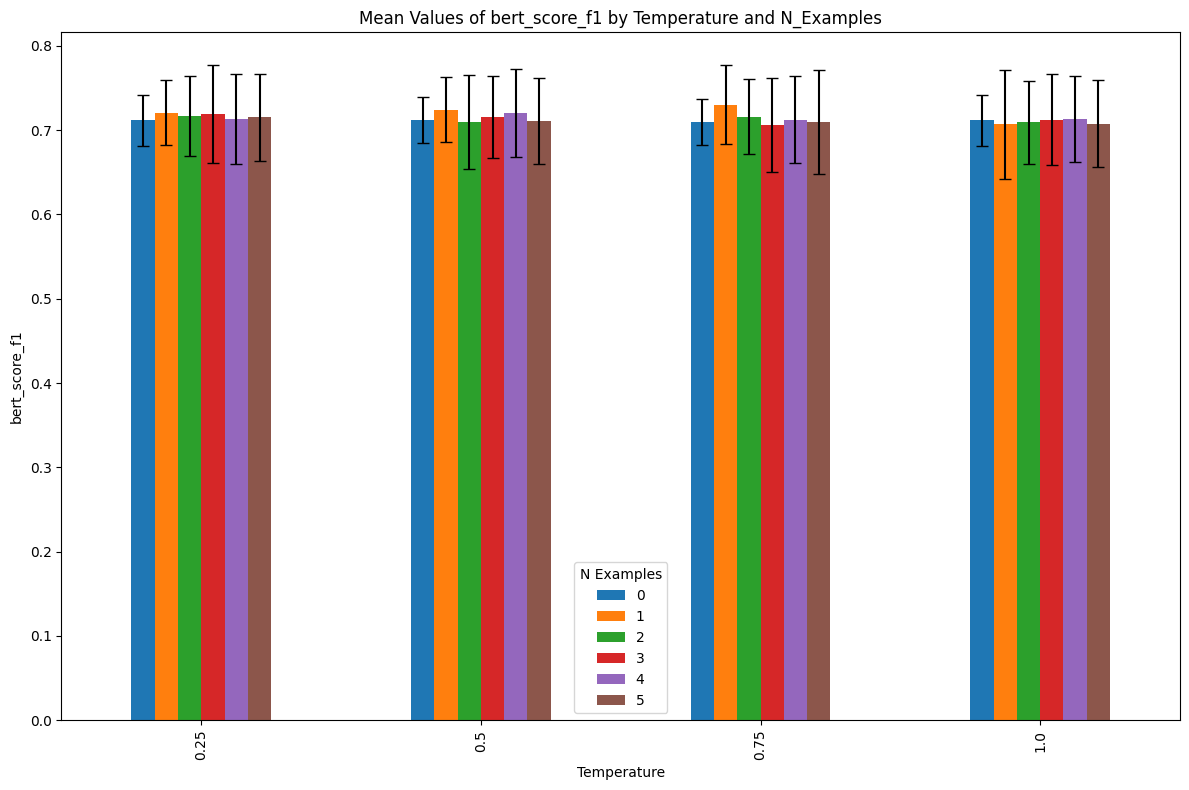

<Figure size 1000x600 with 0 Axes>

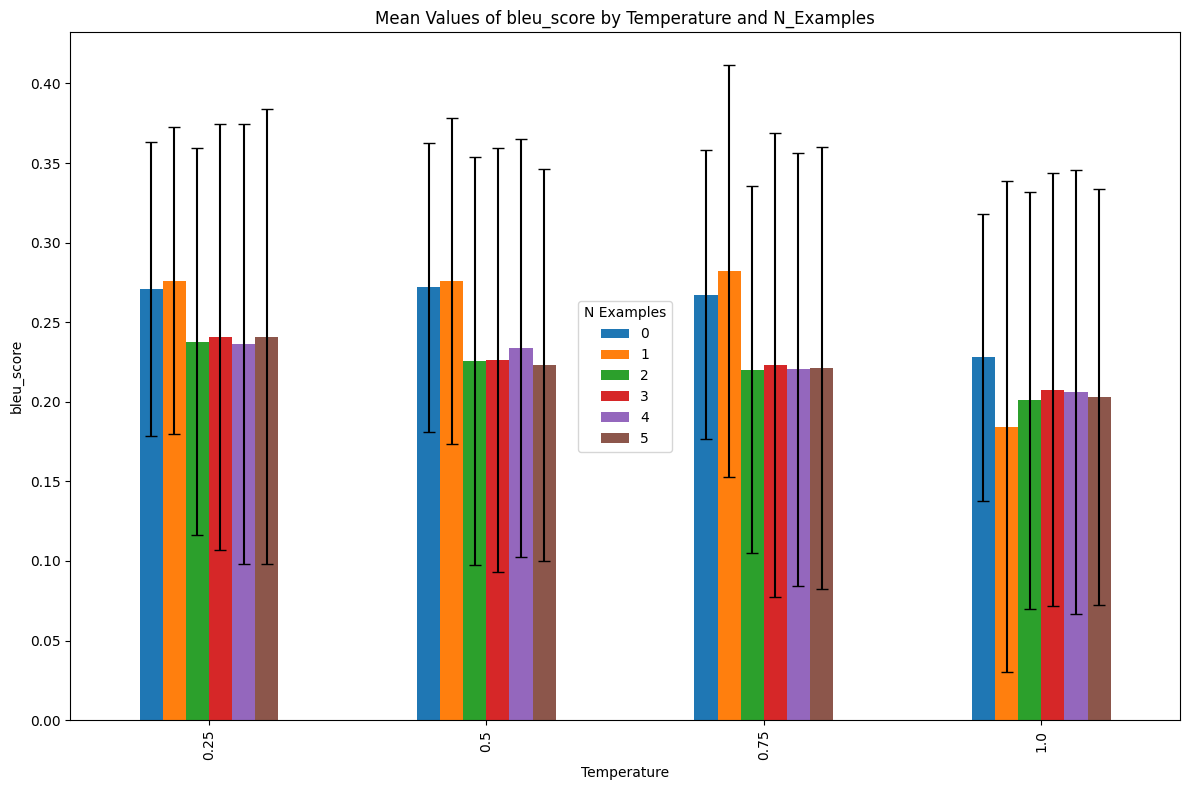

<Figure size 1000x600 with 0 Axes>

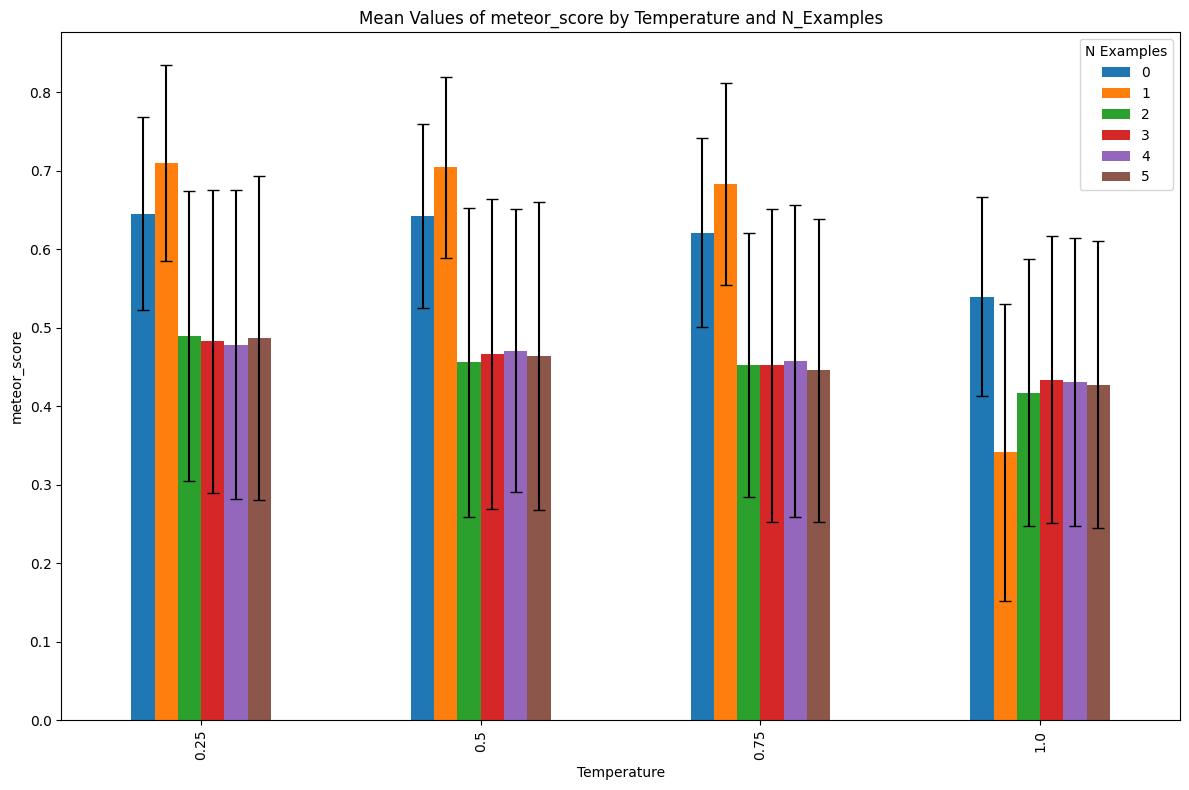

<Figure size 1000x600 with 0 Axes>

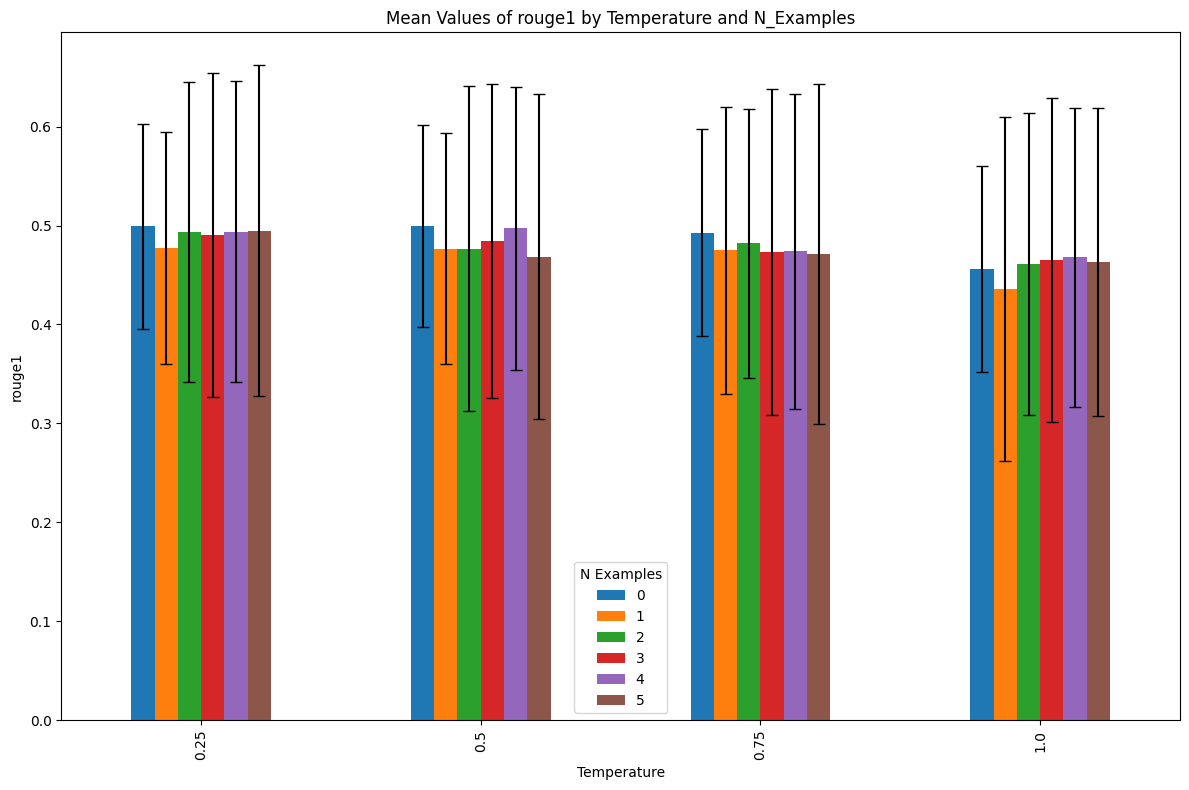

<Figure size 1000x600 with 0 Axes>

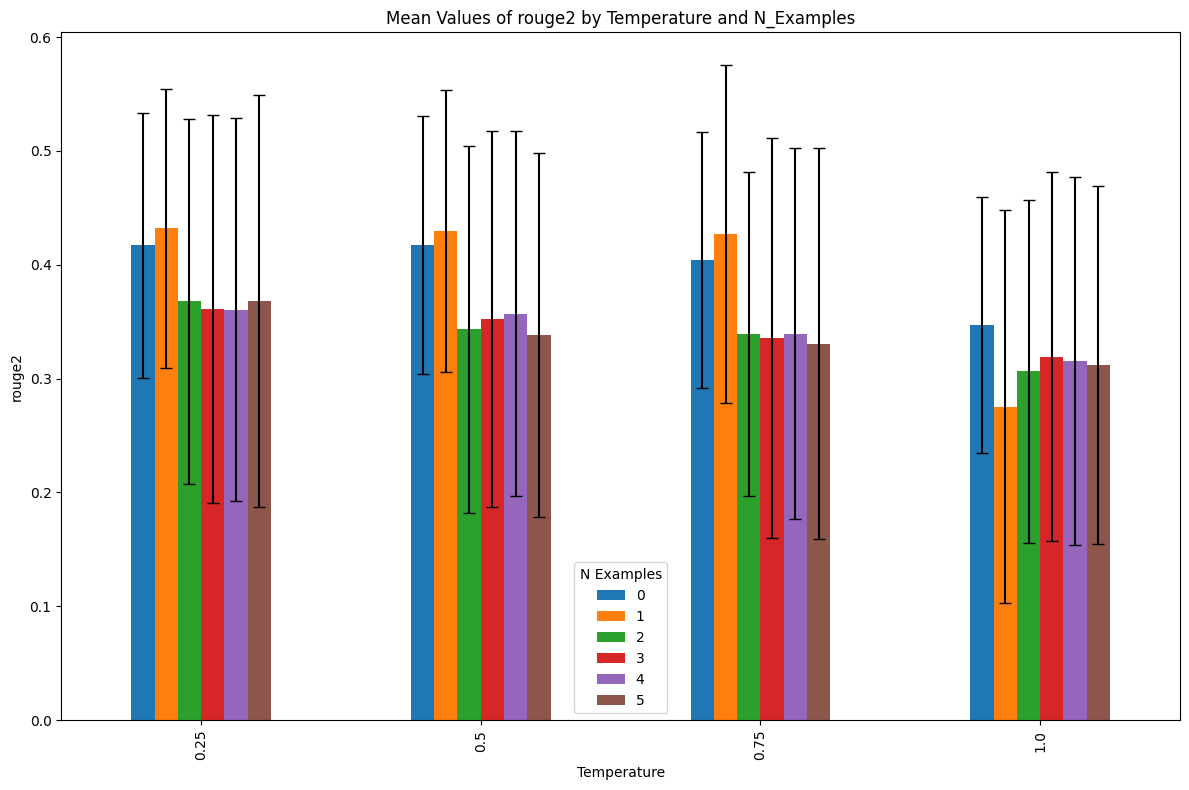

<Figure size 1000x600 with 0 Axes>

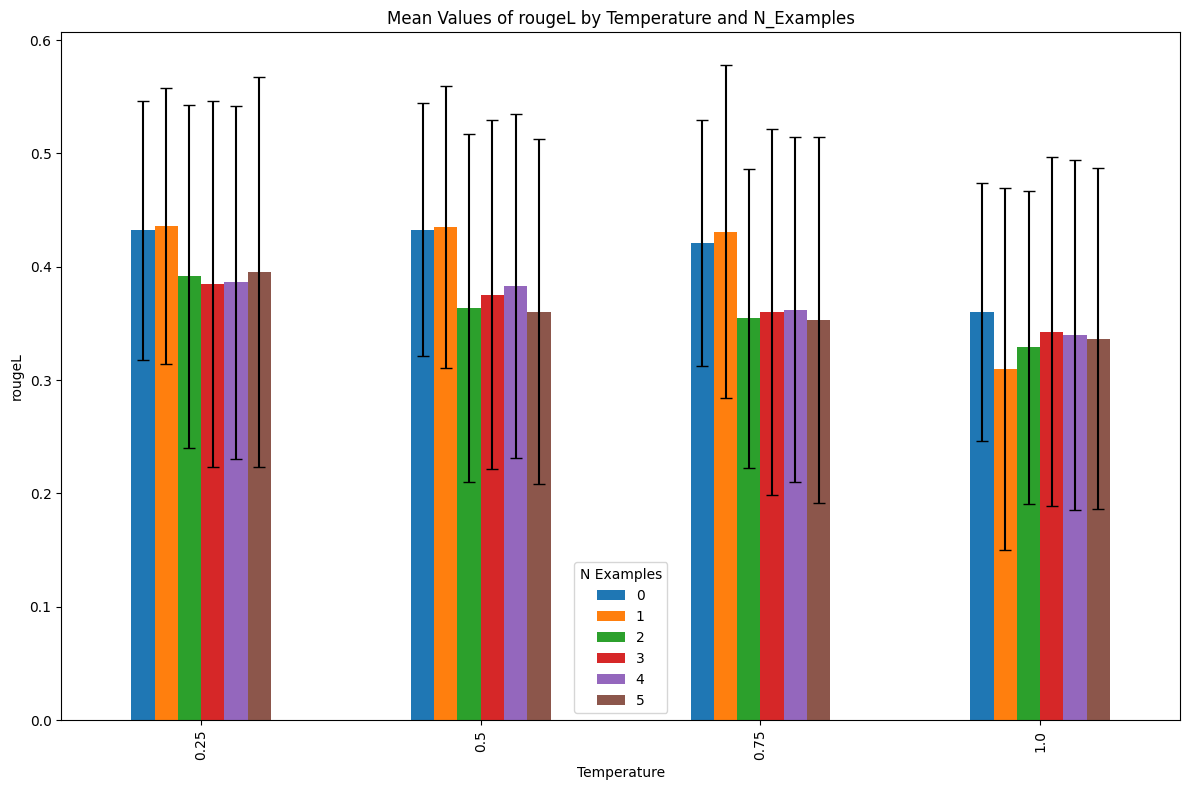

In [8]:
import matplotlib.pyplot as plt

for metric in df.drop(['relatorio', 'voto', 'acordao', 'generated', 'model', 'n_examples', 'temperature'], axis=1).columns:
    means = summary[(metric, 'mean')].unstack()
    std_devs = summary[(metric, 'std')].unstack()

    plt.figure(figsize=(10, 6))
    means.plot(kind='bar', yerr=std_devs, capsize=4, figsize=(12, 8))
    plt.title(f'Mean Values of {metric} by Temperature and N_Examples')
    plt.ylabel(metric)
    plt.xlabel('Temperature')
    plt.legend(title="N Examples")
    plt.tight_layout()
    plt.show()

In [9]:
df.drop(['relatorio', 'voto', 'acordao', 'generated', 'model', 'n_examples', 'temperature'], axis=1).columns

Index(['bert_score_precision', 'bert_score_recall', 'bert_score_f1',
       'bleu_score', 'meteor_score', 'rouge1', 'rouge2', 'rougeL'],
      dtype='object')

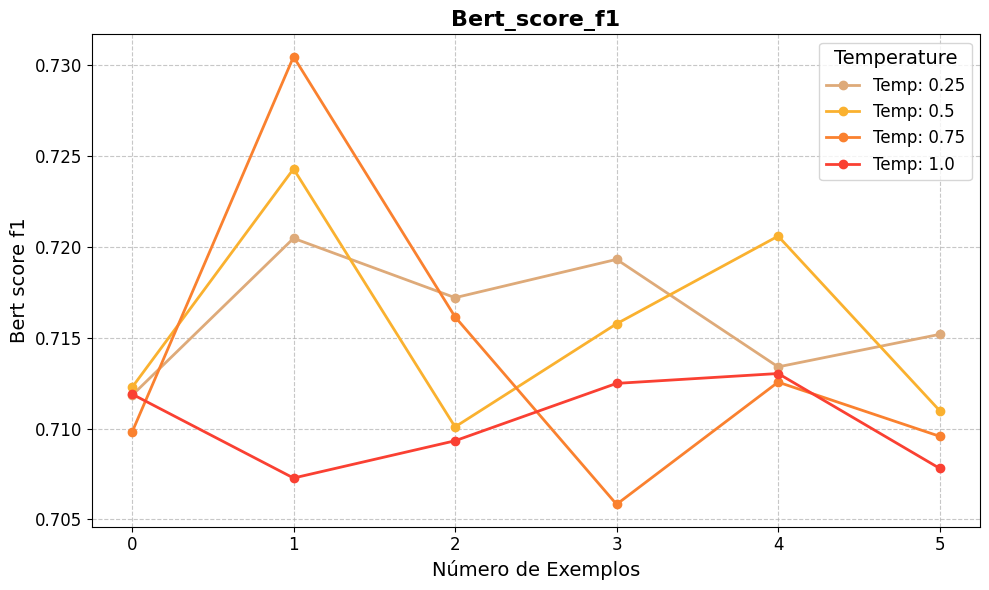

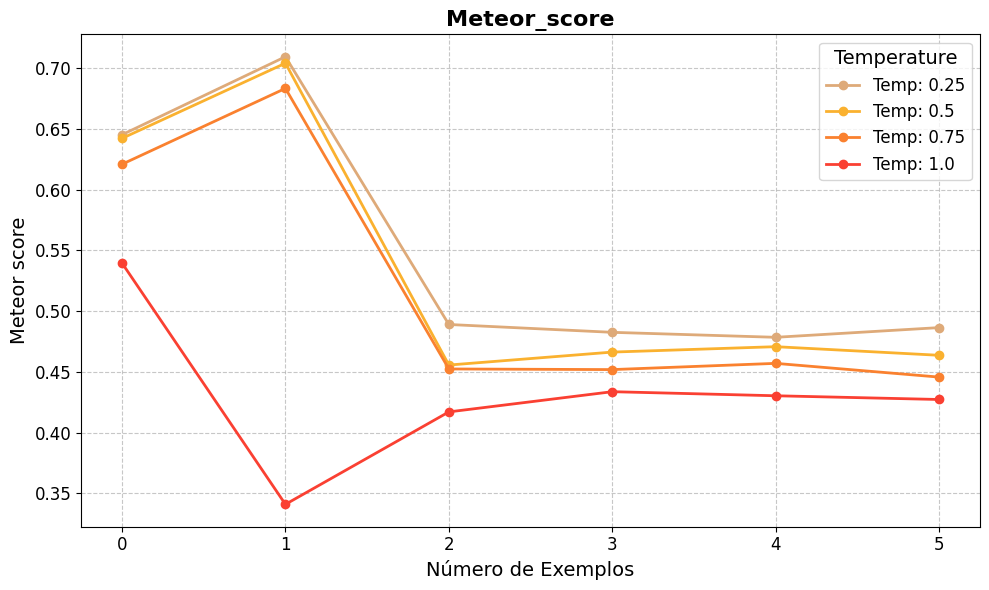

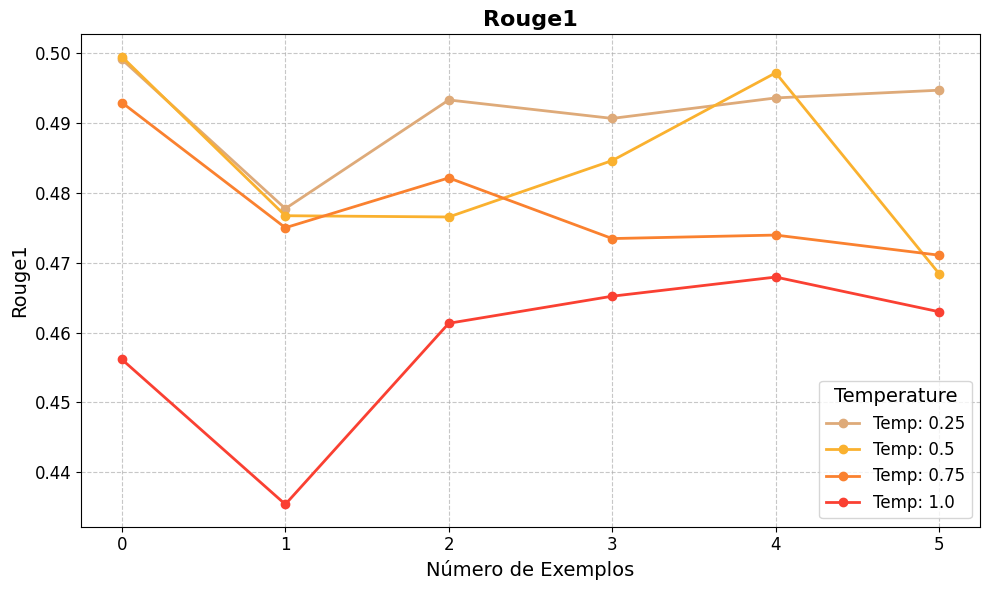

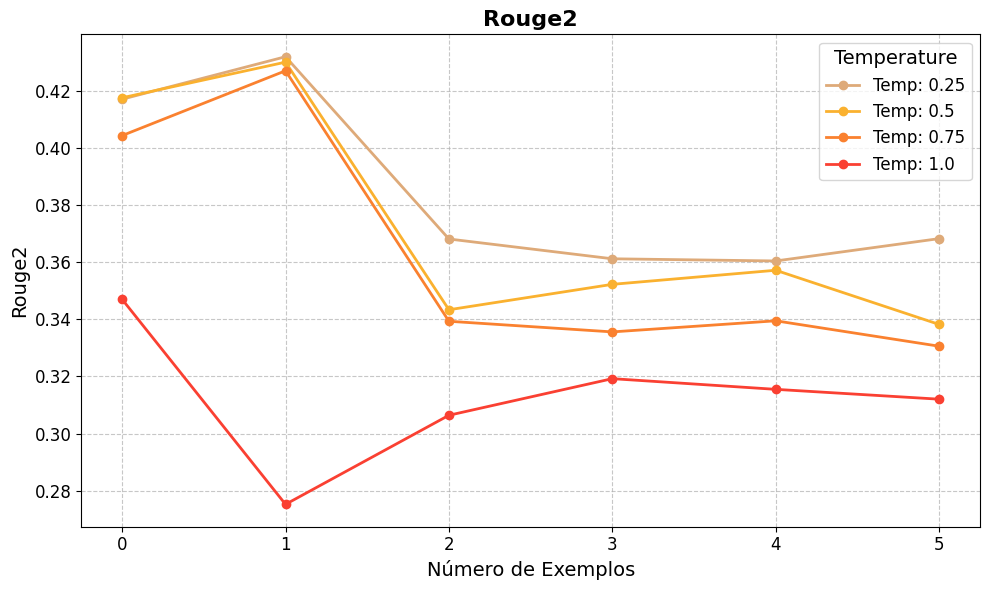

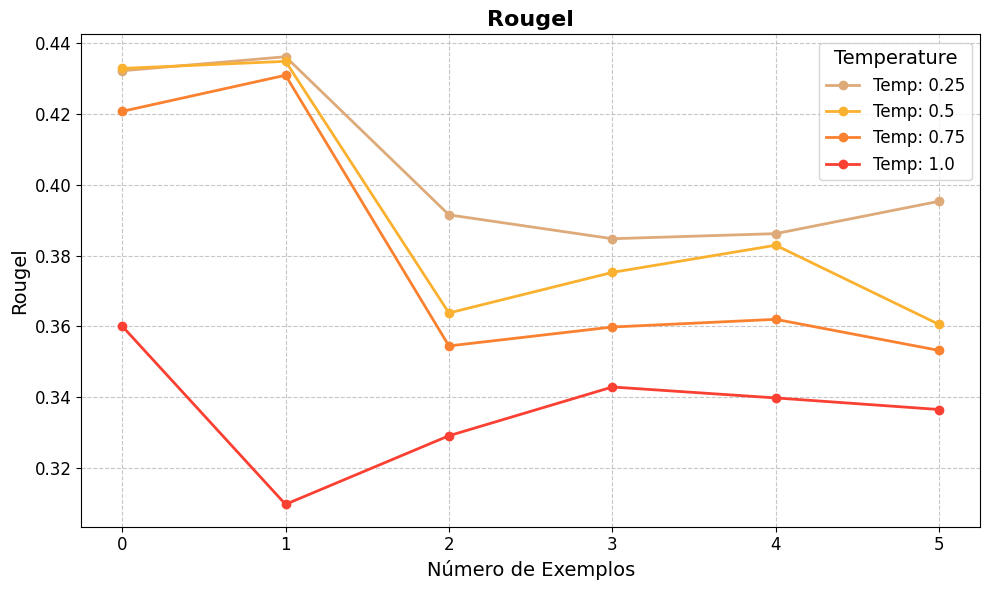

In [30]:
metrics = ['bert_score_f1', 'meteor_score', 'rouge1', 'rouge2', 'rougeL']
group = df.drop(['relatorio', 'voto', 'acordao', 'generated', 'model'], axis=1).groupby(
        ['temperature', 'n_examples']
    ).mean().reset_index()

colors = ['#DEAA79', '#FAB12F', '#FA812F', '#FA4032']  # Verde, laranja, azul, vermelho, roxo
color_map = {temp: color for temp, color in zip(sorted(group['temperature'].unique()), colors)}

for metric in metrics:
    plt.figure(figsize=(10, 6))
    for temp in group['temperature'].unique():
        subset = group[group['temperature'] == temp]
        plt.plot(subset['n_examples'], subset[metric], marker='o', linestyle='-', linewidth=2, label=f"Temp: {temp}", color=color_map[temp])

    plt.title(f'{metric.capitalize()}', fontsize=16, fontweight='bold')
    plt.xlabel('Número de Exemplos', fontsize=14)
    plt.ylabel(metric.replace('_', ' ').capitalize(), fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Temperature', fontsize=12, title_fontsize=14)
    plt.grid(visible=True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()